In [1]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3e}'.format})

from limits import LimitFigure
import rnog as rnog

# Starting Info

Loading in the Veffs, establishing the uptimes, and how many stations of each time will exist as a function of time.

In [2]:
# load in all the volumes

energies = rnog.veff["hilo"]["energy"]

veff_hilo = rnog.veff["hilo"]["veff"]
veff_pa = rnog.veff["pa"]["veff"]
veff_didaq = rnog.veff["didaq"]["veff"]

hilo_livetime = rnog.hilo_livetime
pa_livetime = rnog.pa_livetime

# July 2025-2026: 8 years of PA (add no stations)
# July 2026-2027: 8 years of PA + 5 years of DiDAQ (add 5 DiDAQ stations)
# July 2027-2028: 8 years of PA + 11 years of DiDAQ (add 6 DiDAQ stations)
# July 2028-2029: 8 years of PA + 17 years of DiDAQ (add 6 DiDAQ stations)
# July 2029-2030: 8 years of PA + 23 years of DiDAQ (add 6 DiDAQ stations)
# July 2030-2031: 8 years of PA + 27 years of DiDAQ (add 4 DiDAQ stations, completing the array)
# July 2031-2040: 9 x (8 PA + 27 DiDAQ) -- run the array for another decade

uptime_hilo = 0.5
uptime_pa = 0.5
uptime_didaq = 2/3
effective_frac = 1./2 # a new station only runs for about 1/2 a season

year_start = 2024
integral_livetime_hilo = {}
integral_livetime_pa = {}
integral_livetime_didaq = {}

####
#### First, Hilo
####
integral_livetime_hilo[year_start] = hilo_livetime
# hilo has the existing livetime
# and that amount stays constant forever, since we stop running the hilo
for y in range(1,17):
    year = year_start + y
    integral_livetime_hilo[year] = integral_livetime_hilo[year_start]

####
#### Second, PA
####
# pa has 1 year of existing livetime
integral_livetime_pa[year_start] = 0
integral_livetime_pa[year_start+1] = pa_livetime
num_pa_stations = {
    2026: 8, 2027: 8, 2028: 8, 2029: 8, 2030: 8, 2031: 8, 2032: 8, 2033: 8, 2034: 8,
    2035: 8, 2036: 8, 2037: 8, 2038: 8, 2039: 8, 2040: 8
}
for y in range(2,17):
    year = year_start + y
    integral_livetime_pa[year] = integral_livetime_pa[year-1] + (num_pa_stations[year] * uptime_pa)

####
#### Third, the DiDAQ
####
# didaqs don't exist yet, but we will add them starting in 2026
# a note: we only get about 1/3 of a season (so, 1/3 of a "station's worth" during their deployment year)
# so that has to be prorated in
num_didaq_stations = {
    2024: 0, 2025: 0, 2026: 5*effective_frac, 2027: 5+(6*effective_frac), 2028: 11+(6*effective_frac), 
    2029: 17+(6*effective_frac), 2030: 23 + (4*effective_frac), 2031: 27, 2032: 27, 2033: 27, 2034: 27,
    2035: 27, 2036: 27, 2037: 27, 2038: 27, 2039: 27, 2040: 27
}
integral_livetime_didaq[year_start] = 0
for y in range(1,17):
    year = year_start + y
    integral_livetime_didaq[year] = integral_livetime_didaq[year-1] + (num_didaq_stations[year] * uptime_didaq)
print(integral_livetime_didaq)

{2024: 0, 2025: 0.0, 2026: 1.6666666666666665, 2027: 7.0, 2028: 16.333333333333332, 2029: 29.666666666666664, 2030: 46.33333333333333, 2031: 64.33333333333333, 2032: 82.33333333333333, 2033: 100.33333333333333, 2034: 118.33333333333333, 2035: 136.33333333333331, 2036: 154.33333333333331, 2037: 172.33333333333331, 2038: 190.33333333333331, 2039: 208.33333333333331, 2040: 226.33333333333331}


Text(0, 0.5, 'Integrated Livetime / years')

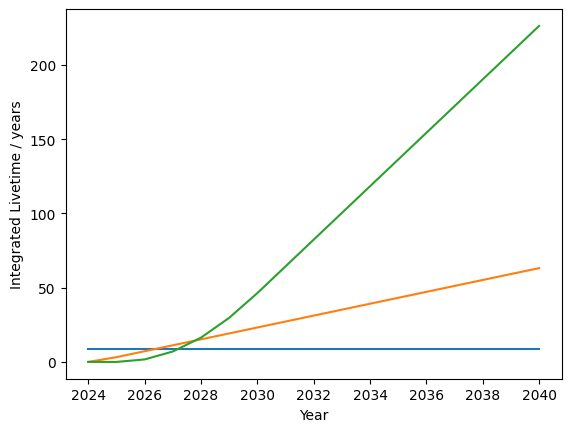

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(integral_livetime_hilo.keys(), integral_livetime_hilo.values(), label="HiLo")
ax.plot(integral_livetime_pa.keys(), integral_livetime_pa.values(), label="PA")
ax.plot(integral_livetime_didaq.keys(), integral_livetime_didaq.values(), label="DiDaQ")
ax.set_xlabel("Year")
ax.set_ylabel("Integrated Livetime / years")


## Compute Limits

array([ 1.000e+07,  3.162e+07,  1.000e+08,  3.162e+08,  1.000e+09,
        3.162e+09,  1.000e+10,  3.162e+10,  1.000e+11,  3.162e+11,
        1.000e+12])
array([ 2.954e-06,  6.028e-07,  1.638e-07,  6.512e-08,  3.791e-08,
        2.714e-08,  2.232e-08,  1.931e-08,  2.414e-08,  2.931e-08,
        4.608e-08])
-------
[ 9.753e-01  1.511e+01  1.759e+02  1.399e+03  7.599e+03  3.356e+04
  1.291e+05  4.718e+05  1.194e+06  3.108e+06  6.251e+06]


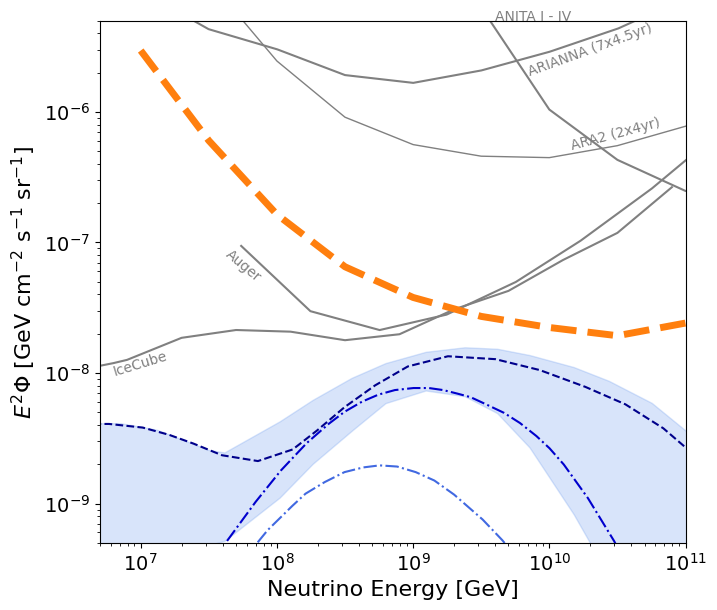

In [21]:
# more_pa_2031 = integral_livetime_pa[2031]
# more_didaq_2031 = integral_livetime_didaq[2031]
# exposure_2031 = (existing_livetime * veff_hilo) + (more_pa_2031 * veff_pa_25sig) + (more_didaq_2031 * veff_didaq_2sig)

more_pa_2040 = integral_livetime_pa[2040]
more_pa_2027 = integral_livetime_pa[2027]
more_didaq_2040 = integral_livetime_didaq[2040]

exposure_today = (hilo_livetime * veff_hilo) + (pa_livetime * veff_pa)
exposure_2027 = exposure_today + (more_pa_2027 * veff_pa)
exposure_2040 = exposure_today + (more_pa_2040 * veff_pa) + (more_didaq_2040 * veff_didaq)

figure = LimitFigure(e_power=2, xlims=(5e6, 1e11), ylims=(0.5e-9, 0.5e-5), font_size=16, tick_size=14)    
figure.build_base_plot('rnog_proposal')

#####
##### on disk
#####
energies, limits = figure.add_limit(name='RNOG', energies=energies,
    veffs=exposure_2027, stations=1, years=1, sup=1,
    color='C1',linestyle='--', label='RNO-G 2027')

energies = np.asarray(energies)
limits = np.asarray(limits)
print(repr(energies))
print(repr(limits))
print('-------')


aeff_cm2_sr_s = energies/limits
aeff_m2_sr_s = aeff_cm2_sr_s/1E4 # convert to m2*sr*s
aeff_m2_s = aeff_m2_sr_s/4/np.pi # convert to m2*s
aeff_m2 = aeff_m2_s/(11*31556926) # normalize it to 7 years of data taking
print(aeff_m2*4*np.pi)

# pretend_livetime = 7*31556926 # years converted to seconds
# limits = limits*pretend_livetime # take the livetime out
# limits = limits/4/np.pi # take the steradian out
# print(limits)


# #####
# ##### by 2040
# #####

# energies, limits = figure.add_limit(name='RNOG', energies=energies,
#     veffs=exposure_2040, stations=1, years=1, sup=1,
#     color='firebrick',linestyle='-.', label='RNO-G 2040')

# energies = np.asarray(energies)
# limits = np.asarray(limits)
# print(repr(energies))
# print(repr(limits))

# figure.show(legend_size=10, save_name='limit_E2FE.png',dpi=300)

# The Integral Exposure

In [6]:
integral_exposure = {}
for y in range(2024,2041):
    integral_exposure[y] = (integral_livetime_hilo[y] * veff_hilo) + (integral_livetime_pa[y] * veff_pa) + (integral_livetime_didaq[y] * veff_didaq)
    integral_exposure[y] = integral_exposure[y] * 1E15 * (86400 * 365) # convert km3 * sr * years to cm3 * sr * seconds

print(integral_exposure)

energies = np.asarray(energies)
# exposure = np.asarray(integral_exposure.values())
print(repr(energies))
# print(repr(exposure))


{2024: array([ 1.692e+20,  2.038e+21,  1.471e+22,  8.786e+22,  3.583e+23,
        1.160e+24,  3.236e+24,  8.843e+24,  1.643e+25,  3.217e+25,
        4.955e+25]), 2025: array([ 3.522e+20,  3.734e+21,  2.762e+22,  1.536e+23,  5.917e+23,
        1.853e+24,  5.071e+24,  1.348e+25,  2.474e+25,  4.754e+25,
        7.161e+25]), 2026: array([ 7.080e+20,  6.986e+21,  5.246e+22,  2.787e+23,  1.032e+24,
        3.150e+24,  8.486e+24,  2.205e+25,  4.002e+25,  7.566e+25,
        1.116e+26]), 2027: array([ 1.342e+21,  1.272e+22,  9.633e+22,  4.979e+23,  1.796e+24,
        5.388e+24,  1.436e+25,  3.668e+25,  6.604e+25,  1.233e+26,
        1.789e+26]), 2028: array([ 2.280e+21,  2.115e+22,  1.610e+23,  8.198e+23,  2.913e+24,
        8.654e+24,  2.291e+25,  5.793e+25,  1.038e+26,  1.921e+26,
        2.758e+26]), 2029: array([ 3.521e+21,  3.228e+22,  2.464e+23,  1.244e+24,  4.385e+24,
        1.295e+25,  3.414e+25,  8.580e+25,  1.532e+26,  2.822e+26,
        4.024e+26]), 2030: array([ 5.016e+21,  4.567e+